In [1]:
from sklearn.preprocessing import StandardScaler
from pycaret.regression import *
import pandas as pd
import numpy as np

In [2]:
ver2 = pd.read_csv('0918_umap_one_hot.csv').drop(['STRG_DT'], axis=1)
ver2_cont = ver2.drop(['cluster_1', 'cluster_2'], axis=1)
ver2_cat = ver2[['cluster_1', 'cluster_2']]

y_val = np.array(ver2_cont.iloc[:, 0]).reshape(-1, 1)
x_val = ver2_cont.drop(['FRST_TREE_CNT'], axis=1)

In [3]:
from sklearn.model_selection import train_test_split

x_train_val, x_test_val = train_test_split(x_val, test_size= 0.2, shuffle = False)
y_train_val, y_test_val = train_test_split(y_val, test_size= 0.2, shuffle = False)

train_cat, test_cat = train_test_split(ver2_cat, test_size= 0.2, shuffle = False)
test_cat = test_cat.reset_index().drop(['index'], axis=1)

In [4]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train_val)
y_test_scaled = y_scaler.transform(y_test_val)

x_scaler = StandardScaler()
x_train_scaled = x_scaler.fit_transform(x_train_val)
x_test_scaled = x_scaler.transform(x_test_val)

In [5]:
y_train_df = pd.DataFrame(y_train_scaled, columns = ['FRST_TREE_CNT'])
x_train_df = pd.DataFrame(x_train_scaled, columns = x_val.columns)

y_test_df = pd.DataFrame(y_test_scaled, columns = ['FRST_TREE_CNT'])
x_test_df = pd.DataFrame(x_test_scaled, columns = x_val.columns)

In [6]:
train_df = pd.concat([y_train_df, x_train_df, train_cat], axis=1)
test_df = pd.concat([y_test_df, x_test_df, test_cat], axis=1)

In [7]:
df2 = pd.concat([train_df, test_df]).reset_index().drop(['index'], axis=1)

In [8]:
#Setup 설정
model2 = setup(df2, target = 'FRST_TREE_CNT', train_size = 0.8, data_split_shuffle = False, fold_strategy='timeseries')

,Description,Value
0,Session id,1021
1,Target,FRST_TREE_CNT
2,Target type,Regression
3,Original data shape,"(26064, 10)"
4,Transformed data shape,"(26064, 10)"
5,Transformed train set shape,"(20851, 10)"
6,Transformed test set shape,"(5213, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [9]:
comp2 = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.6558,0.8007,0.7665,-8.2302,0.3765,1.6607,0.4000
gbr,Gradient Boosting Regressor,0.6678,0.8042,0.7940,-9.0366,0.3875,1.5867,0.6190
catboost,CatBoost Regressor,0.6743,0.7973,0.7947,-8.8024,0.3919,1.5949,2.8570
lightgbm,Light Gradient Boosting Machine,0.6747,0.8387,0.7985,-9.2643,0.4032,1.5319,0.2040
knn,K Neighbors Regressor,0.6847,0.8568,0.8165,-9.8003,0.3990,1.6846,0.0820
ada,AdaBoost Regressor,0.7142,0.9040,0.8197,-8.9794,0.3971,1.4957,0.2940
rf,Random Forest Regressor,0.6867,0.8929,0.8276,-10.2760,0.4054,1.6806,0.8750
lr,Linear Regression,0.7255,0.9001,0.8300,-10.5520,0.3537,2.1361,2.1320
ridge,Ridge Regression,0.7254,0.9001,0.8300,-10.5512,0.3537,2.1351,0.0350
br,Bayesian Ridge,0.7255,0.9004,0.8302,-10.5530,0.3540,2.1340,0.0280


<br/> Extra Tree Regressor

In [10]:
et_model = create_model('et', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.2010,0.0646,0.2541,-1.7250,0.0788,0.0845


In [11]:
et_tuned = tune_model(et_model, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2849,0.1298,0.3603,-0.3682,0.2656,0.8883
1,0.4135,0.2889,0.5375,-1.4597,0.2940,0.3514
2,0.5895,0.4795,0.6924,-3.7107,0.3141,0.3711
3,0.5575,0.3983,0.6311,-4.5494,0.3227,0.9004
4,0.6485,0.7043,0.8392,-0.5817,0.4465,5.5035
5,0.9484,1.0277,1.0138,-11.6912,0.3014,2.2942
6,0.2634,0.1247,0.3531,-10.8883,0.1824,2.3195
7,0.2717,0.0917,0.3029,-0.8046,0.2178,2.1755
8,0.5912,0.5380,0.7335,-0.9885,0.4208,0.7358


[I 2023-09-25 23:28:42,377] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 23:50:46,849] Finished hyperparameter search!


In [12]:
et_final = finalize_model(et_tuned)

In [13]:
predict_model(et_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1316,0.0221,0.1487,0.0673,0.0452,0.0578


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.301555
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.301555
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.301463
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.301555
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.301555
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.297696
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.297696
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.297696
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.297696


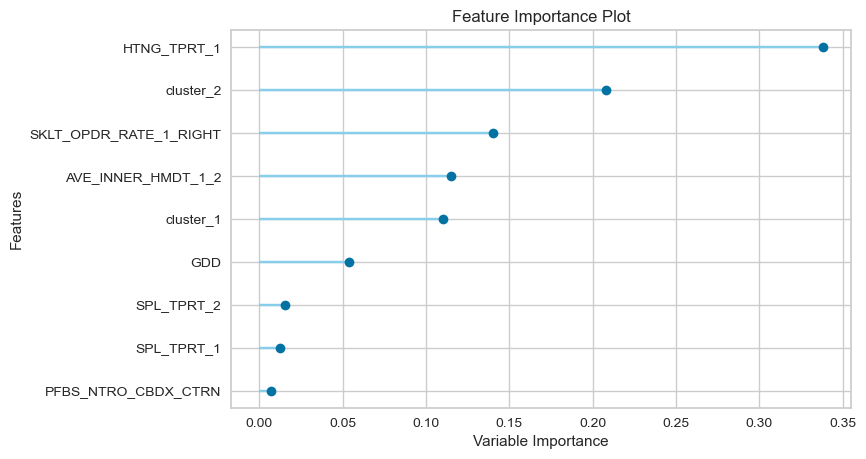

In [14]:
plot_model(et_final, plot='feature')

In [15]:
save_model(et_final, 'Extra_Tree_UMAP_TS')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(bootstrap=True, max_depth=11,
                                      max_features=0.8327743877524318,
                                      min_impurity_decrease=0.0002902194739322308,
                                 

In [16]:
Extra_Tree_UMAP_TS = load_model('Extra_Tree_UMAP_TS', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Gradient Boosting Regressor

In [17]:
gbr_model = create_model('gbr', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.5294,0.6470,0.8044,-26.3099,0.3273,0.2278


In [18]:
gbr_tuned = tune_model(gbr_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2791,0.1484,0.3853,-0.5646,0.2386,0.6938
1,0.4951,0.3700,0.6083,-2.1501,0.3458,0.4572
2,0.6813,0.6324,0.7952,-5.2135,0.3748,0.4268
3,0.5394,0.3806,0.6170,-4.3036,0.3147,0.8639
4,0.6611,0.6890,0.8301,-0.5475,0.4413,5.3590
5,0.7645,0.7307,0.8548,-8.0240,0.3295,1.7937
6,0.2977,0.1391,0.3730,-12.2667,0.2132,2.5546
7,0.3133,0.1803,0.4246,-2.5468,0.2140,1.5023
8,0.5645,0.5214,0.7221,-0.9271,0.4088,0.6807


[I 2023-09-25 23:56:43,661] Searching the best hyperparameters using 20851 samples...
[I 2023-09-26 00:03:09,402] Finished hyperparameter search!


In [19]:
gbr_final = finalize_model(gbr_tuned)

In [20]:
predict_model(gbr_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0570,0.0050,0.0707,0.7892,0.0216,0.0251


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.182354
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.191379
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.190071
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.206442
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.205229
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.270168
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.270168
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.286023
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.297639


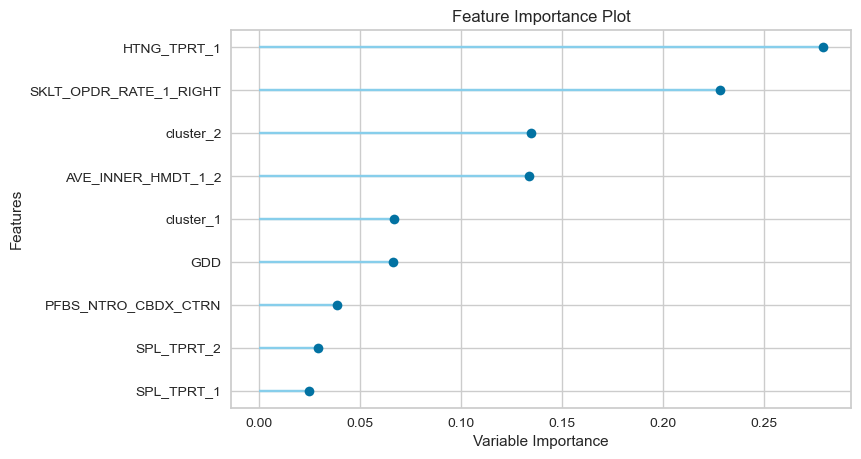

In [21]:
plot_model(gbr_final, plot='feature')

In [22]:
save_model(gbr_final, 'Gradient_Boosting_UMAP_TS')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  GradientBoostingRegressor(learning_rate=0.10488569918976434,
                                            max_depth=7,
                                            max_features=0.4328249697650217,
                                          

In [23]:
Gradient_Boosting_UMAP_TS = load_model('Gradient_Boosting_UMAP_TS', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Light GBM Regressor

In [24]:
gbm_model = create_model('lightgbm', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4884,0.5942,0.7708,-24.0790,0.3206,0.2102


In [25]:
gbm_tuned = tune_model(gbm_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2781,0.1361,0.3690,-0.4348,0.2476,0.7802
1,0.4860,0.3751,0.6124,-2.1933,0.3490,0.4352
2,0.6527,0.5066,0.7118,-3.9774,0.3208,0.4255
3,0.5648,0.3778,0.6147,-4.2643,0.3151,0.8849
4,0.6350,0.6662,0.8162,-0.4963,0.4328,5.2236
5,0.7600,0.6908,0.8312,-7.5311,0.3569,1.7404
6,0.3133,0.1863,0.4317,-16.7706,0.2125,2.5532
7,0.3112,0.1586,0.3983,-2.1205,0.2202,1.5688
8,0.6115,0.5984,0.7736,-1.2120,0.4390,0.7661


[I 2023-09-26 00:21:17,551] Searching the best hyperparameters using 20851 samples...
[I 2023-09-26 00:23:37,173] Finished hyperparameter search!


In [26]:
gbm_final = finalize_model(gbm_tuned)

In [27]:
predict_model(gbm_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0723,0.0100,0.0998,0.5793,0.0306,0.0306


[LightGBM] [Warning] feature_fraction is set=0.7674884570247903, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7674884570247903
[LightGBM] [Warning] bagging_fraction is set=0.5162184638774926, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5162184638774926
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.100273
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.102612
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.109928
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.101506
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.099368
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.262727
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.262727
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.262727
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.275559


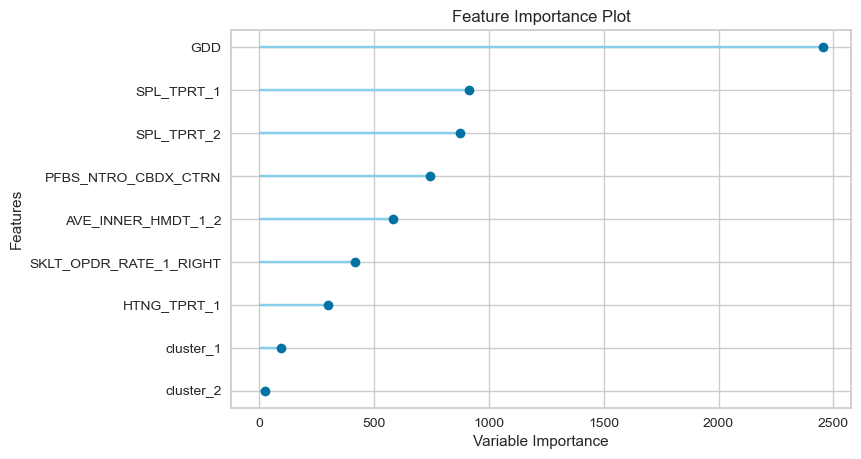

In [28]:
plot_model(gbm_final, plot='feature')

In [29]:
save_model(gbm_final, 'Light_GBM_UMAP_TS')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy...frequent'))),
                 ('actual_estimator',
                  LGBMRegressor(bagging_fraction=0.5162184638774926,
                                bagging_freq=6,
                                feature_fraction=0.7674884570247903,
                                learning_rate=0.05551154410370208,
      

In [30]:
Light_GBM_UMAP_TS = load_model('Light_GBM_UMAP_TS', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Cat Boost Regressor

In [31]:
cb_model = create_model('catboost', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.3004,0.1591,0.3988,-5.7138,0.1321,0.1268


In [32]:
cb_tuned = tune_model(cb_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2718,0.1489,0.3859,-0.5693,0.2180,0.6432
1,0.5944,0.4963,0.7045,-3.2252,0.4212,0.5793
2,0.6453,0.6118,0.7822,-5.0107,0.3702,0.3997
3,0.5513,0.3778,0.6146,-4.2635,0.3162,0.8688
4,0.6226,0.6438,0.8024,-0.4460,0.4256,5.1565
5,0.8884,0.9826,0.9913,-11.1340,0.3200,2.2454
6,0.3419,0.2149,0.4636,-19.4946,0.2402,2.9706
7,0.3459,0.1930,0.4393,-2.7968,0.2514,1.5225
8,0.6204,0.6280,0.7925,-1.3212,0.4461,0.7531


[I 2023-09-26 00:31:16,127] Searching the best hyperparameters using 20851 samples...
[I 2023-09-26 00:43:13,046] Finished hyperparameter search!


In [33]:
cb_final = finalize_model(cb_tuned)

In [34]:
predict_model(cb_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0892,0.0126,0.1124,0.4666,0.0341,0.0389


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.220279
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.221201
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.221201
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.220279
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.227561
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.348918
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.348918
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.382453
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.388943


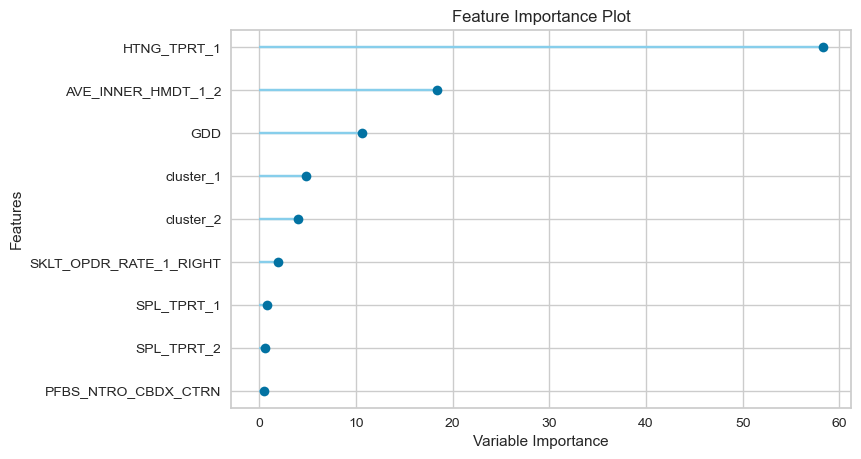

In [35]:
plot_model(cb_final, plot='feature')

In [37]:
save_model(cb_final, 'Cat_Boost_UMAP_TS')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  <catboost.core.CatBoostRegressor object at 0x00000180DB2E6580>)]),
 'Cat_Boost_UMAP_KF.pkl')

In [36]:
Cat_Boost_UMAP_TS = load_model('Cat_Boost_UMAP_TS', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Ada Regressor

In [37]:
ada_model = create_model('ada', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.5229,0.6074,0.7794,-24.6383,0.3019,0.2251


In [38]:
ada_tuned = tune_model(ada_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2704,0.1470,0.3834,-0.5495,0.2218,0.6389
1,0.5612,0.5126,0.7159,-3.3640,0.4315,0.5163
2,0.7509,0.7540,0.8683,-6.4077,0.4206,0.4726
3,0.5946,0.4317,0.6570,-5.0149,0.3339,0.9523
4,0.6567,0.6821,0.8259,-0.5320,0.4357,5.2547
5,0.6639,0.5812,0.7623,-6.1769,0.4349,1.3629
6,0.2168,0.0901,0.3001,-7.5890,0.1459,1.6260
7,0.3109,0.1355,0.3682,-1.6665,0.2067,2.0073
8,0.6470,0.6567,0.8104,-1.4274,0.4623,0.7979


[I 2023-09-26 01:19:49,951] Searching the best hyperparameters using 20851 samples...
[I 2023-09-26 01:36:31,212] Finished hyperparameter search!


In [39]:
ada_final = finalize_model(ada_tuned)

In [41]:
predict_model(ada_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,0.1259,0.0196,0.1400,0.1731,0.0426,0.0553


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.277781
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.277781
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.277781
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.277781
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.277781
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.268267
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.268267
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.268267
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.268267


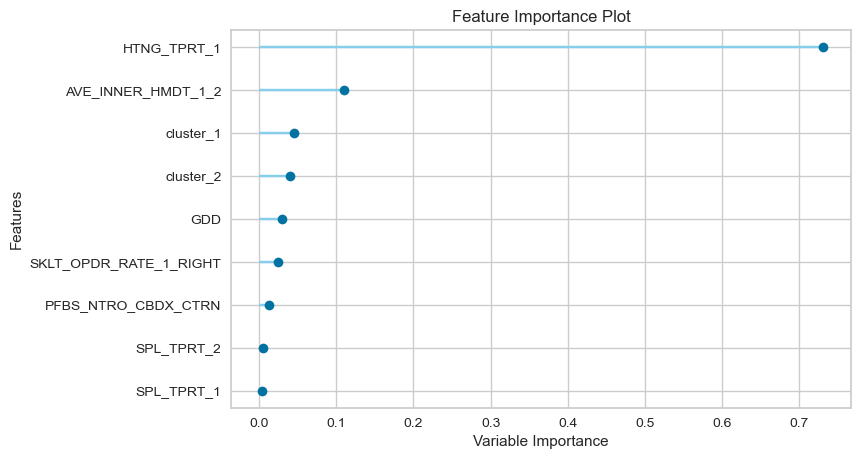

In [42]:
plot_model(ada_final, plot='feature')

In [44]:
save_model(ada_final, 'ADA_UMAP_TS')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  AdaBoostRegressor(learning_rate=0.2134188643601319,
                                    n_estimators=223, random_state=1021))]),
 'ADA_UMAP_TS.pkl')

In [45]:
ADA_UMAP_TS = load_model('ADA_UMAP_TS', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Random Forest Regressor

In [46]:
rf_model = create_model('rf', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.5219,0.7703,0.8776,-31.5115,0.4038,0.2233


In [47]:
rf_tuned = tune_model(rf_model, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2700,0.1454,0.3813,-0.5328,0.2233,0.6471
1,0.4890,0.3860,0.6213,-2.2862,0.3561,0.4350
2,0.7038,0.7144,0.8452,-6.0186,0.4089,0.4387
3,0.5775,0.3985,0.6313,-4.5522,0.3248,0.9052
4,0.6648,0.7327,0.8560,-0.6457,0.4519,5.5262
5,0.7674,0.7178,0.8472,-7.8637,0.3417,1.7087
6,0.3523,0.1872,0.4326,-16.8513,0.2252,2.7098
7,0.3308,0.1887,0.4344,-2.7128,0.2157,1.9305
8,0.6162,0.5959,0.7719,-1.2024,0.4360,0.7915


[I 2023-09-26 01:45:03,281] Searching the best hyperparameters using 20851 samples...
[I 2023-09-26 02:50:16,634] Finished hyperparameter search!


In [48]:
rf_final = finalize_model(rf_tuned)

In [49]:
predict_model(rf_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.1137,0.0174,0.1320,0.2644,0.0403,0.0502


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.270701
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.270701
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.270701
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.270701
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.270701
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.270701
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.270701
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.270701
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.270701


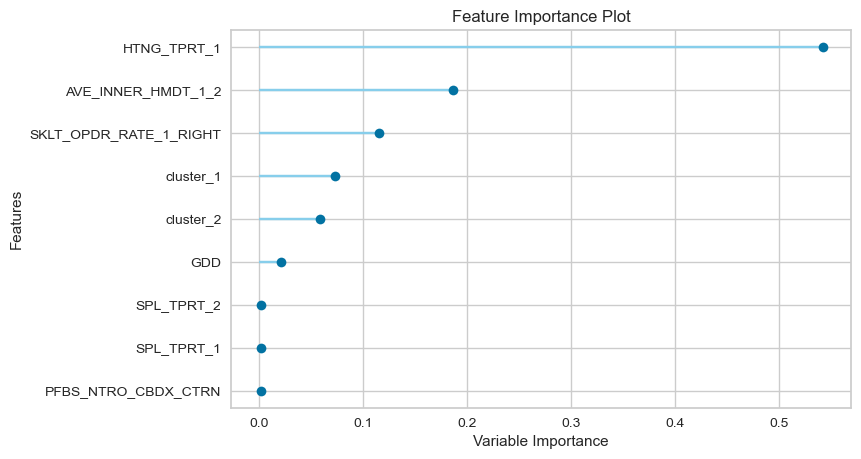

In [50]:
plot_model(rf_final, plot='feature')

In [51]:
save_model(rf_final, 'Random_Forest_UMAP_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  RandomForestRegressor(max_depth=5,
                                        max_features=0.8017867319741496,
                                        min_impurity_decrease=3.499624532531445e-07,
                                        min_

In [52]:
Random_Forest_UMAP_KF = load_model('Random_Forest_UMAP_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> KNN Regressor

In [53]:
knn_model = create_model('knn', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.3272,0.4074,0.6383,-16.1972,0.2749,0.1389


In [55]:
knn_tuned = tune_model(knn_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2846,0.1367,0.3697,-0.4405,0.2528,0.8419
1,0.6155,0.5872,0.7663,-3.9994,0.4614,0.5758
2,0.4959,0.3576,0.5980,-2.5131,0.2684,0.3233
3,0.6378,0.5198,0.7209,-6.2420,0.3585,1.0273
4,0.6473,0.6989,0.8360,-0.5698,0.4455,5.4807
5,0.9791,1.1761,1.0845,-13.5233,0.2886,2.1531
6,0.2775,0.1112,0.3335,-9.6080,0.2052,2.3205
7,0.2778,0.1066,0.3265,-1.0968,0.2211,2.2506
8,0.5600,0.4785,0.6917,-0.7684,0.3930,0.7229


[I 2023-09-26 03:23:26,184] Searching the best hyperparameters using 20851 samples...
[I 2023-09-26 03:24:26,908] Finished hyperparameter search!


In [56]:
knn_final = finalize_model(knn_tuned)

In [57]:
predict_model(knn_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.0734,0.0091,0.0955,0.6154,0.0290,0.0320


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.190179
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.191390
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.201073
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.201073
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.198652
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.326953
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.334216
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.341478
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.351161


In [59]:
save_model(knn_final, 'KNN_UMAP_TS')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  KNeighborsRegressor(metric='manhattan', n_jobs=-1,
                                      n_neighbors=51))]),
 'KNN_UMAP_TS.pkl')

In [60]:
KNN_UMAP_TS = load_model('KNN_UMAP_TS', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Model Ensemble 1

In [62]:
Blend1_UMAP_TS = blend_models([Gradient_Boosting_UMAP_TS, ADA_UMAP_TS, Extra_Tree_UMAP_TS], choose_better=True, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2781,0.1408,0.3753,-0.4843,0.2407,0.7398
1,0.4892,0.3779,0.6148,-2.2177,0.3510,0.4401
2,0.6721,0.6108,0.7816,-5.0016,0.3655,0.4203
3,0.5553,0.3938,0.6275,-4.4863,0.3210,0.8978
4,0.6539,0.6831,0.8265,-0.5343,0.4393,5.3711
5,0.7921,0.7446,0.8629,-8.1947,0.3447,1.8163
6,0.2272,0.0986,0.3139,-8.3996,0.1590,2.0304
7,0.2898,0.1239,0.3520,-1.4373,0.2057,1.8155
8,0.5976,0.5664,0.7526,-1.0936,0.4333,0.7180


In [63]:
Blend1_tuned = tune_model(Blend1_UMAP_TS, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2752,0.1469,0.3833,-0.5482,0.2312,0.6736
1,0.5230,0.4235,0.6507,-2.6053,0.3805,0.4808
2,0.7087,0.6792,0.8241,-5.6733,0.3922,0.4428
3,0.5578,0.3942,0.6279,-4.4924,0.3210,0.8989
4,0.6569,0.6769,0.8228,-0.5204,0.4369,5.3135
5,0.7232,0.6443,0.8027,-6.9571,0.3608,1.6081
6,0.2264,0.0952,0.3086,-8.0835,0.1590,1.9778
7,0.3028,0.1453,0.3811,-1.8577,0.2090,1.6739
8,0.6002,0.5783,0.7604,-1.1374,0.4379,0.7158


[I 2023-09-26 04:33:28,242] Searching the best hyperparameters using 20851 samples...
[I 2023-09-26 04:35:10,009] Finished hyperparameter search!


In [64]:
UMAP_TS_ENS1 = finalize_model(Blend1_tuned)

In [65]:
predict_model(UMAP_TS_ENS1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0883,0.0099,0.0995,0.5819,0.0304,0.0388


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.230323
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.234880
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.234217
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.242487
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.241874
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.270131
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.270131
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.278137
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.284003


In [66]:
save_model(UMAP_TS_ENS1, 'UMAP_TS_ENS1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy...
                                                                                   transformer=SimpleImputer(strategy='most_frequent'))),
                                                               ('actual_estimator',
                                                                ExtraTreesRegressor(boot

In [67]:
UMAP_TS_ENS1 = load_model('UMAP_TS_ENS1', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Model Ensemble 2

In [72]:
Blend2_UMAP_TS = blend_models([Gradient_Boosting_UMAP_TS, Light_GBM_UMAP_TS, KNN_UMAP_TS], choose_better=True, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2797,0.1397,0.3738,-0.4726,0.2465,0.7628
1,0.5275,0.4303,0.6560,-2.6639,0.3815,0.4803
2,0.6094,0.4761,0.6900,-3.6773,0.3112,0.3909
3,0.5568,0.4083,0.6390,-4.6893,0.3250,0.9042
4,0.6448,0.6754,0.8218,-0.5169,0.4377,5.3520
5,0.8344,0.8113,0.9007,-9.0191,0.3067,1.8951
6,0.2506,0.1019,0.3192,-8.7204,0.1842,2.1892
7,0.2970,0.1385,0.3721,-1.7241,0.2055,1.7399
8,0.5722,0.5261,0.7253,-0.9446,0.4136,0.6839


In [73]:
Blend2_tuned = tune_model(Blend2_UMAP_TS, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2813,0.1431,0.3783,-0.5083,0.2451,0.7536
1,0.5415,0.4454,0.6674,-2.7922,0.3910,0.5002
2,0.6050,0.4935,0.7025,-3.8490,0.3202,0.3838
3,0.5600,0.4219,0.6495,-4.8783,0.3290,0.9131
4,0.6530,0.6871,0.8289,-0.5432,0.4414,5.4067
5,0.8521,0.8563,0.9254,-9.5744,0.3064,1.9396
6,0.2587,0.1002,0.3166,-8.5593,0.1950,2.2428
7,0.2963,0.1390,0.3728,-1.7343,0.2025,1.7794
8,0.5576,0.4996,0.7068,-0.8467,0.4011,0.6666


[I 2023-09-26 05:07:33,293] Searching the best hyperparameters using 20851 samples...
[I 2023-09-26 05:18:09,416] Finished hyperparameter search!


In [74]:
UMAP_TS_ENS2 = finalize_model(Blend2_UMAP_TS)

In [75]:
predict_model(UMAP_TS_ENS2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0607,0.0058,0.0760,0.7565,0.0229,0.0262


[LightGBM] [Warning] feature_fraction is set=0.7674884570247903, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7674884570247903
[LightGBM] [Warning] bagging_fraction is set=0.5162184638774926, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5162184638774926
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.157602
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.161793
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.167024
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.169674
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.167749
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.286616
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.289037
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.296743
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.308120


In [76]:
save_model(UMAP_TS_ENS2, 'UMAP_TS_ENS2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy...
                                                                                            'SPL_TPRT_1',
                                                                                            'HTNG_TPRT_1',
                                                                                            'SPL_

In [77]:
UMAP_KF_ENS2 = load_model('UMAP_TS_ENS2', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded
